In [6]:
import pickle
from collections import defaultdict, Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

%matplotlib inline


In [2]:
with open('data/molecules.p', 'rb') as fp:
    molecules = pickle.load(fp)

In [64]:
molecules_by_name = {m.name:m for m in molecules}

In [20]:
molecule = molecules[10000]
len(molecule.atoms)

15

In [21]:
atoms = molecule.atoms
distances = []
for i,ai in enumerate(atoms):
    for j in range(i+1, len(atoms)):
        aj = atoms[j]
        d = ((ai.position - aj.position)**2).sum()**0.5
        distances.append(d)
distances = pd.Series(distances)
distances.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
0,105.0,3.079496,1.22481,0.971426,2.175291,2.804009,3.912659,6.130252


In [72]:

def compute_and_show_bonds(molecule):
    import state
    from importlib import reload
    reload(state)

    from state import BOND_LENGTH_THRESHOLDS, ALLOWED_BONDS_COUNT
    
    
    atoms = molecule.atoms
    atoms_by_type = defaultdict(list)
    for atom in atoms:
        atoms_by_type[atom.atom_type.symbol].append(atom.position)


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for atom_type, positions in sorted(atoms_by_type.items()):
        xs, ys, zs = np.array(positions).T
        ax.scatter(xs, ys, zs, marker='o', s=200, label=atom_type)
    
    bonds = defaultdict(int)
    for i,ai in enumerate(atoms):
        for j in range(i+1, len(atoms)):
            aj = atoms[j]
            d = ((ai.position - aj.position)**2).sum()**0.5
            tp = ''.join(sorted([ai.atom_type.symbol, aj.atom_type.symbol]))        
            t = BOND_LENGTH_THRESHOLDS[tp]
            if t is not None and d < t:
                xs, ys, zs = np.array([ai.position, aj.position]).T
                ax.plot(xs, ys, zs, color='k')
                bonds[i] += 1
                bonds[j] += 1

    plt.legend(loc='upper right')

    for i,atom in enumerate(atoms):
        mn, mx = ALLOWED_BONDS_COUNT[atom.atom_type.symbol]
        if not (mn <= bonds[i] <= mx):
            print(f'bad number of bonds {bonds[i]} for {i}, {atom.atom_type.symbol}')
        
    return ax

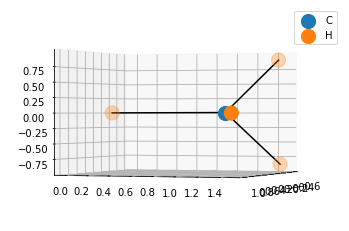

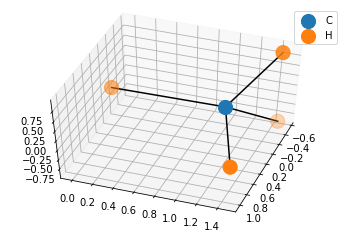

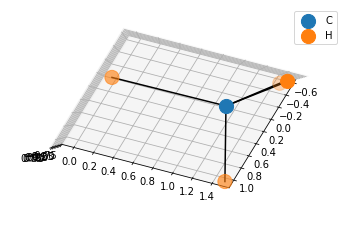

In [60]:
compute_and_show_bonds(molecules[0]).view_init(elev=0., azim=20)
compute_and_show_bonds(molecules[0]).view_init(elev=50., azim=20)
compute_and_show_bonds(molecules[0]).view_init(elev=90., azim=20)

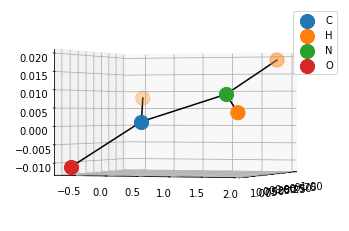

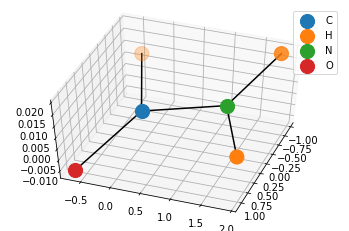

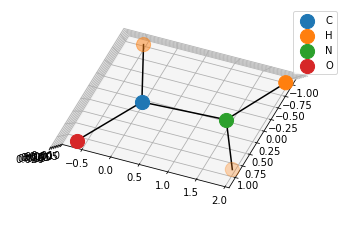

In [61]:
compute_and_show_bonds(molecules[10]).view_init(elev=0., azim=20)
compute_and_show_bonds(molecules[10]).view_init(elev=50., azim=20)
compute_and_show_bonds(molecules[10]).view_init(elev=90., azim=20)

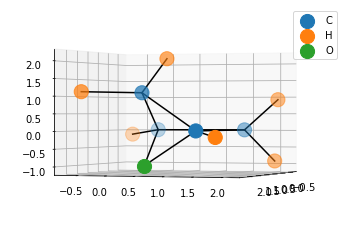

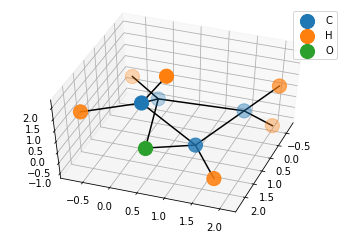

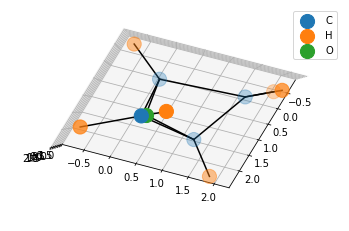

In [62]:
compute_and_show_bonds(molecules[100]).view_init(elev=0., azim=20)
compute_and_show_bonds(molecules[100]).view_init(elev=50., azim=20)
compute_and_show_bonds(molecules[100]).view_init(elev=90., azim=20)

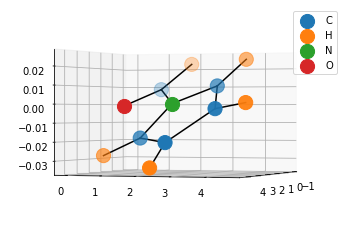

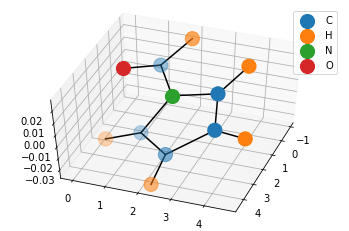

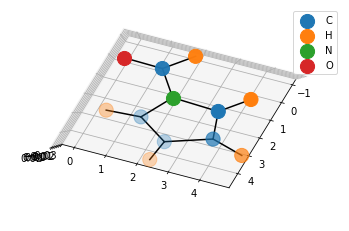

In [63]:
compute_and_show_bonds(molecules[1000]).view_init(elev=0., azim=20)
compute_and_show_bonds(molecules[1000]).view_init(elev=50., azim=20)
compute_and_show_bonds(molecules[1000]).view_init(elev=90., azim=20)

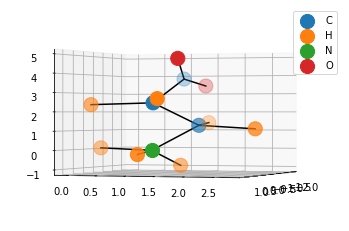

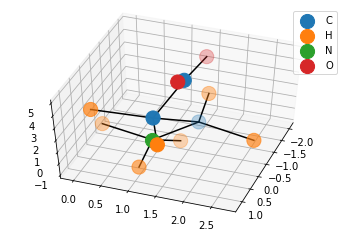

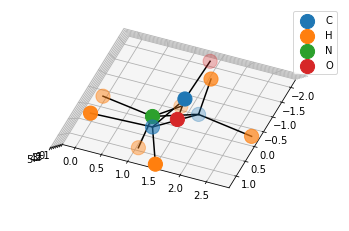

In [82]:
m = molecules_by_name['dsgdb9nsd_000271']
compute_and_show_bonds(m).view_init(elev=0., azim=20)
compute_and_show_bonds(m).view_init(elev=50., azim=20)
compute_and_show_bonds(m).view_init(elev=90., azim=20)